In [1]:
import networkx as nx
# https://networkx.github.io/documentation/stable/reference/index.html
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# load the graph
# The graph is an extraction from LinkedIn Social Network
G = nx.read_gexf("mediumLinkedin.gexf")

# Exploration of the graph : relational data understanding

In [3]:
# networkx short summary of information for the graph g
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 811
Number of edges: 1597
Average degree:   3.9383


Let's dive deeper into the graph statistics

In [7]:
# Graph Statistics
num_nodes = len(G.nodes)
num_edges = len(G.edges)
density = nx.density(G)
avg_degree = sum(dict(G.degree()).values()) / num_nodes
num_components = nx.number_connected_components(G)
largest_component_size = len(max(nx.connected_components(G), key=len))
diameter = nx.diameter(G)

print("Graph Statistics:")
print("Number of Nodes:", num_nodes)
print("Number of Edges:", num_edges)
print("Density:", density)
print("Average Degree:", avg_degree)
print("Number of Connected Components:", num_components)
print("Size of Largest Connected Component:", largest_component_size)
print("Diameter:", diameter)

Graph Statistics:
Number of Nodes: 811
Number of Edges: 1597
Density: 0.004862157677611849
Average Degree: 3.938347718865598
Number of Connected Components: 1
Size of Largest Connected Component: 811
Diameter: 19


We will now study the different attributes distributions

In [5]:
# Load the 'name' column from the empty CSV file
df_empty = pd.read_csv('empty.csv')

# Load dataframes
df_college = pd.read_csv('college_with_60percent_of_nodes_remoded.csv', sep='\t', header='infer')
df_employer = pd.read_csv('employer_with_60percent_of_nodes_remoded.csv', sep='\t', header='infer')
df_location = pd.read_csv('location_with_60percent_of_nodes_remoded.csv', sep='\t', header='infer')

# Merge dataframes on the 'name' column
employer_df = pd.merge(df_employer, df_empty,  on='name', how='left')
location_df = pd.merge(df_location, df_empty,  on='name', how='left')
college_df = pd.merge(df_college, df_empty,  on='name', how='left')

merged_df = pd.merge(employer_df, location_df,  on='name', how='right')
merged_df = pd.merge( college_df, merged_df, on='name', how='left')

# Get filled nodes
filled_nodes_college = df_college['name'].drop_duplicates().tolist()
filled_nodes_location = df_location['name'].drop_duplicates().tolist()
filled_nodes_employer = df_employer['name'].drop_duplicates().tolist()

# Find empty nodes
missing_college_nodes = set(G.nodes()) - set(filled_nodes_college)
missing_location_nodes = set(G.nodes()) - set(filled_nodes_location)
missing_employer_nodes = set(G.nodes()) - set(filled_nodes_employer)

After preparing the dataframes, we plot the different frequencies of attributes: 

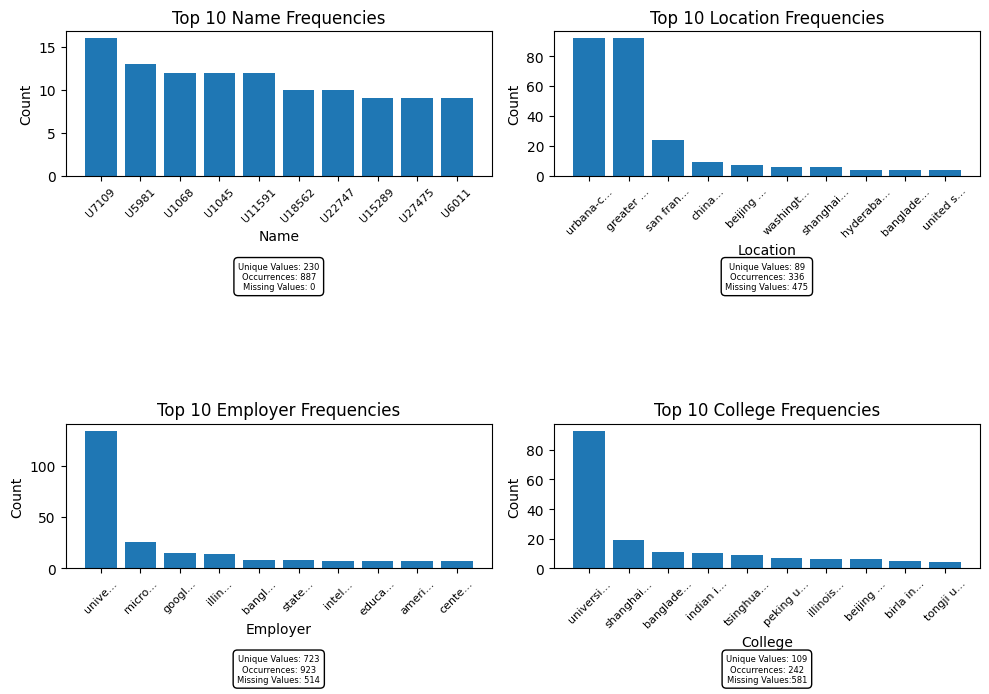

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

unique_values_name = len(merged_df['name'].value_counts())
unique_values_location = len(location_df['location'].value_counts())
unique_values_employer = len(employer_df['employer'].value_counts())
unique_values_college = len(college_df['college'].value_counts())

# Plot for 'name' attribute
name_counts = merged_df['name'].value_counts()
axs[0, 0].bar(name_counts.index[:10], name_counts.values[:10])
axs[0, 0].set_title('Top 10 Name Frequencies')
axs[0, 0].set_xlabel('Name')
axs[0, 0].set_ylabel('Count')
axs[0, 0].tick_params(axis='x', rotation=45, labelsize=8)

text = f"Unique Values: {unique_values_name}\nOccurrences: {name_counts.sum()}\nMissing Values: {merged_df['name'].isnull().sum()}"
axs[0, 0].text(0.5, -0.7, text, ha='center', va='center', transform=axs[0, 0].transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'), fontsize=6)

# Plot for 'location' attribute
location_counts = location_df['location'].apply(lambda x: str(x)[:8]+"...").value_counts()
axs[0, 1].bar(location_counts.index[:10], location_counts.values[:10])
axs[0, 1].set_title('Top 10 Location Frequencies')
axs[0, 1].set_xlabel('Location')
axs[0, 1].set_ylabel('Count')
axs[0, 1].tick_params(axis='x', rotation=45, labelsize=8)

text = f"Unique Values: {unique_values_location}\nOccurrences: {location_counts.sum()}\nMissing Values: {len(missing_location_nodes)}"
axs[0, 1].text(0.5, -0.7, text, ha='center', va='center', transform=axs[0, 1].transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'), fontsize=6)
# Plot for 'employer' attribute
employer_counts = employer_df['employer'].apply(lambda x: str(x)[:5]+"...").value_counts()
axs[1, 0].bar(employer_counts.index[:10], employer_counts.values[:10])
axs[1, 0].set_title('Top 10 Employer Frequencies')
axs[1, 0].set_xlabel('Employer')
axs[1, 0].set_ylabel('Count')
axs[1, 0].tick_params(axis='x', rotation=45, labelsize=8)

text = f"Unique Values: {unique_values_employer}\nOccurrences: {employer_counts.sum()}\nMissing Values: {len(missing_employer_nodes)}"
axs[1, 0].text(0.5, -0.7, text, ha='center', va='center', transform=axs[1, 0].transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'), fontsize=6)

# Plot for 'college' attribute
college_counts = college_df['college'].apply(lambda x: str(x)[:8]+"...").value_counts()
axs[1, 1].bar(college_counts.index[:10], college_counts.values[:10])
axs[1, 1].set_title('Top 10 College Frequencies')
axs[1, 1].set_xlabel('College')
axs[1, 1].set_ylabel('Count')
axs[1, 1].tick_params(axis='x', rotation=45, labelsize=8)

text = f"Unique Values: {unique_values_college}\nOccurrences: {college_counts.sum()}\nMissing Values:{len(missing_college_nodes)}"
axs[1, 1].text(0.5, -0.7, text, ha='center', va='center', transform=axs[1, 1].transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'), fontsize=6)

plt.tight_layout()
plt.show()


In analyzing our data, we observed duplicate entries, indicating multiple occurrences of attributes for individual nodes. Given this, deciding which attribute to prioritize—like employers, locations, or colleges—poses a challenge. With 89 unique locations and certain ones being significantly more common than others, there's a risk of bias towards overrepresented locations. Similarly, highly represented employers and colleges among the top 10 also raise concerns about bias. Awareness of these biases is crucial for our analysis, especially given the potential impact on the quality of results.

In [8]:
# Load the dataframes
df_employer = pd.read_csv('employer_with_60percent_of_nodes_remoded.csv', sep='\t', header='infer')
df_location = pd.read_csv('location_with_60percent_of_nodes_remoded.csv', sep='\t', header='infer')

# Merge the dataframes on the 'name' column
merged_df = pd.merge(df_employer, df_location, on='name', how='inner')

# Count the number of non-null values for the 'location' attribute
nodes_with_location = merged_df['location'].notnull().sum()

total_nodes_with_employer = len(df_employer)

# Calculate the percentage of nodes with both employer and location data
percentage_with_both_data = (nodes_with_location/ total_nodes_with_employer) * 100

print(f"Percentage of nodes with both employer and location data: {percentage_with_both_data:.2f}%")

Percentage of nodes with both employer and location data: 100.00%


We've observed an interesting trend where every node with employer information also has corresponding location data. This prompts us to reconsider the significance of employment details in our prediction task.

Now we will try to see which centrality measures tell the most about an individual's influence

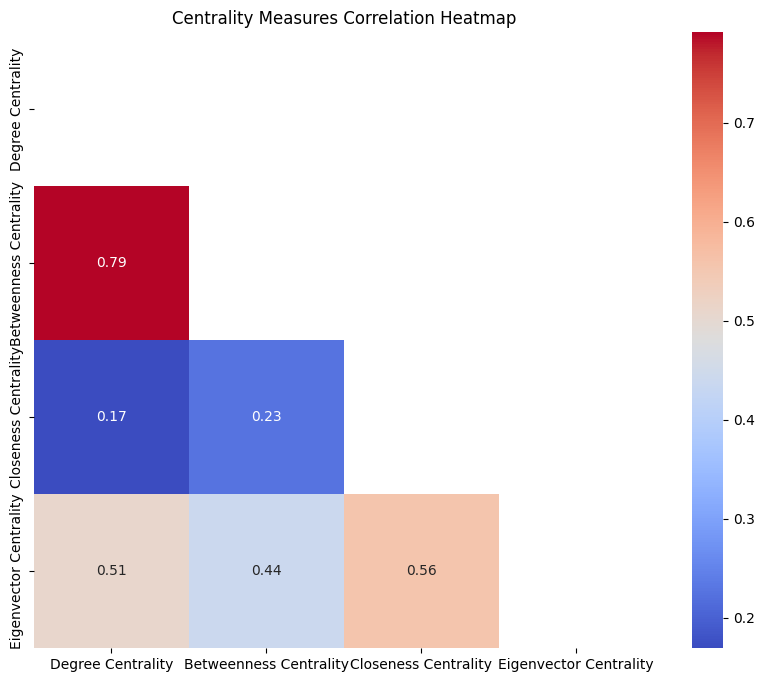

In [3]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Create a DataFrame to store centrality measures
centrality_df = pd.DataFrame({
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Closeness Centrality': closeness_centrality,
    'Eigenvector Centrality': eigenvector_centrality
})

# Calculate correlation matrix
correlation_matrix = centrality_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot heatmap with only one side
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Centrality Measures Correlation Heatmap')
plt.show()



The highest correlation is between the degree centrality and the betweenness centrality . This suggests that highly connected nodes play a crucial role in mediating interactions and influencing the flow of information


# Find inluencers

Given the results of our analysis, we chose to attribute to each individual an influence score that takes into account different criteria

In [26]:
def influencer_score(influencer_scores, num_bay_area_connections, degree, betweenness, clustering):
    # Define weights for each criterion
    weight_num_bay_area_connections = 0.3
    weight_degree = 0.2
    weight_betweenness = 0.4
    weight_clustering = 0.1
    
    # Normalize the values to make them comparable in the score
    max_num_bay_area_connections = max(num_bay_area_connections.values())
    normalized_num_bay_area_connections = {node: value / max_num_bay_area_connections for node, value in num_bay_area_connections.items()}
    
    max_degree = max(degree.values())
    normalized_degree = {node: value / max_degree for node, value in degree.items()}
    
    max_betweenness = max(betweenness.values())
    normalized_betweenness = {node: value / max_betweenness for node, value in betweenness.items()}
    
    max_clustering = max(clustering.values())
    normalized_clustering = {node: value / max_clustering for node, value in clustering.items()}
    
    for node in betweenness.keys():
        score = (
                 weight_num_bay_area_connections * normalized_num_bay_area_connections[node] +
                 weight_degree * normalized_degree[node] +
                 weight_betweenness * normalized_betweenness[node] +
                 weight_clustering * normalized_clustering[node])
        influencer_scores[node] = score


Then, we calculate the score for each influencer and select the top 10. We have done this in the end of the Fill_empty_nodes file to apply it on our final dataset after the prediction of the missing data.